In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import string
import cv2 as cv

# 2-D Transforms

In [2]:
# points a, b, c and d
a, b, c, d = (0,0,1), (0,1,1), (1,1,1), (1,0,1)

# matrix with rox vectors of points
P = np.array([a, b, c, d]).T

In [3]:
# 120-degrees rotation
t1 = 2*np.pi/3
H1 = [[np.cos(t1), np.sin(t1), 0.], [-np.sin(t1), np.cos(t1), 0.], [0., 0., 1.]]

# Translation
x2,y2 = (0.5,0.25)
H2 = [[1., 0., x2], [0., 1., y2], [0., 0., 1.]]

# Scaling
scale3 = 2
H3 = [[scale3, 0, 0.], [0, scale3, 0.], [0., 0., 1.]]

# Reflection
H4 = [[-1, 0., 0.], [0., -1, 0.], [0., 0., 1.]]

# Shear
xs,ys = (0.2,0.3)
H5 = [[1, ys, 0.], [xs, 1, 0.], [0., 0., 1.]]

# Euclidian
H6 = np.matmul(H1,H2)

# Similarity
H7 = np.matmul(H1,np.matmul(H2,H3))

# Affinity
H8 = np.matmul(H1,np.matmul(H2,H5))

# Projection
H9 = [[1,-1,0],[0,0,-1],[1,1,1]]

In [4]:
Pt1 = np.matmul(H1, P)
Pt2 = np.matmul(H2, P)
Pt3 = np.matmul(H3, P)
Pt4 = np.matmul(H4, P)
Pt5 = np.matmul(H5, P)
Pt6 = np.matmul(H6, P)
Pt7 = np.matmul(H7, P)
Pt8 = np.matmul(H8, P)
Pt9 = np.matmul(H9, P)

In [5]:
P = P/P[-1, :]
P = np.insert(P, 4, P[:,0], axis=1)
x = P[0, :]
y = P[1, :]

In [6]:
Pt1 = Pt1/Pt1[-1, :]
Pt1 = np.insert(Pt1, 4, Pt1[:,0], axis=1)
xt1 = Pt1[0, :]
yt1 = Pt1[1, :]

Pt2 = Pt2/Pt2[-1, :]
Pt2 = np.insert(Pt2, 4, Pt2[:,0], axis=1)
xt2 = Pt2[0, :]
yt2 = Pt2[1, :]

Pt3 = Pt3/Pt3[-1, :]
Pt3 = np.insert(Pt3, 4, Pt3[:,0], axis=1)
xt3 = Pt3[0, :]
yt3 = Pt3[1, :]

Pt4 = Pt4/Pt4[-1, :]
Pt4 = np.insert(Pt4, 4, Pt4[:,0], axis=1)
xt4 = Pt4[0, :]
yt4 = Pt4[1, :]

Pt5 = Pt5/Pt5[-1, :]
Pt5 = np.insert(Pt5, 4, Pt5[:,0], axis=1)
xt5 = Pt5[0, :]
yt5 = Pt5[1, :]

Pt6 = Pt6/Pt6[-1, :]
Pt6 = np.insert(Pt6, 4, Pt6[:,0], axis=1)
xt6 = Pt6[0, :]
yt6 = Pt6[1, :]

Pt7 = Pt7/Pt7[-1, :]
Pt7 = np.insert(Pt7, 4, Pt7[:,0], axis=1)
xt7 = Pt7[0, :]
yt7 = Pt7[1, :]

Pt8 = Pt8/Pt8[-1, :]
Pt8 = np.insert(Pt8, 4, Pt8[:,0], axis=1)
xt8 = Pt8[0, :]
yt8 = Pt8[1, :]

Pt9 = Pt9/Pt9[-1, :]
Pt9 = np.insert(Pt9, 4, Pt9[:,0], axis=1)
xt9 = Pt9[0, :]
yt9 = Pt9[1, :]

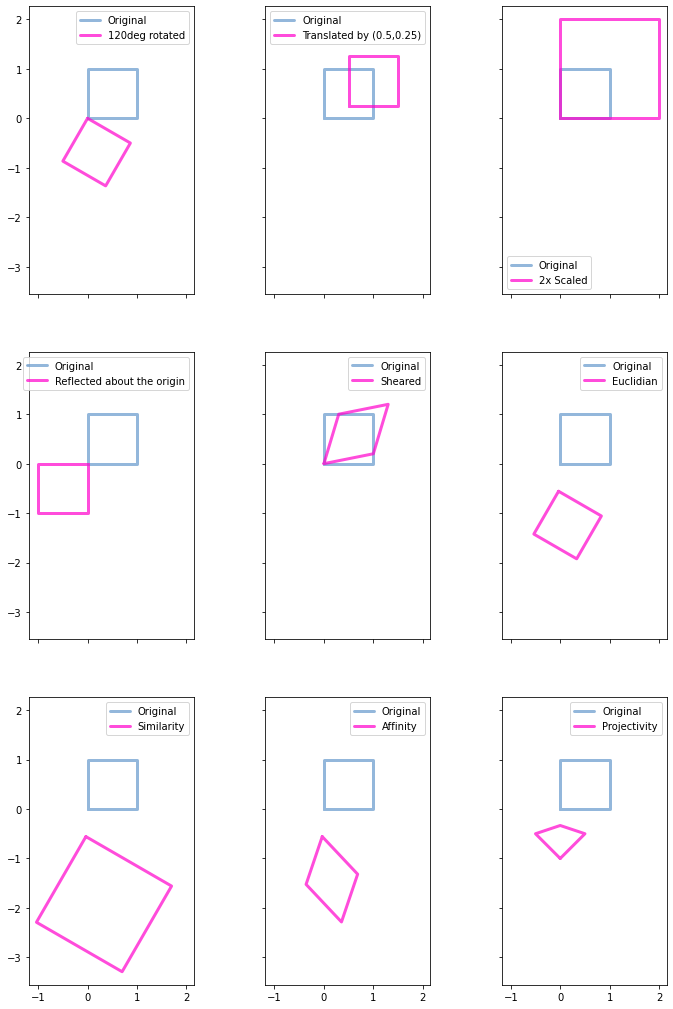

In [7]:
fig,ax = plt.subplots(3,3, sharex=True, sharey=True, figsize=(12,18))

ax[0,0].plot(x, y, color='#6699cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2, label='Original')
ax[0,0].plot(xt1, yt1, color='#ff00cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2, label='120deg rotated')
ax[0,0].legend()
ax[0,0].set_aspect('equal')

ax[0,1].plot(x, y, color='#6699cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2, label='Original')
ax[0,1].plot(xt2, yt2, color='#ff00cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2, label='Translated by (0.5,0.25)')
ax[0,1].legend()
ax[0,1].set_aspect('equal')

ax[0,2].plot(x, y, color='#6699cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2, label='Original')
ax[0,2].plot(xt3, yt3, color='#ff00cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2, label='2x Scaled')
ax[0,2].legend()
ax[0,2].set_aspect('equal')

ax[1,0].plot(x, y, color='#6699cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2, label='Original')
ax[1,0].plot(xt4, yt4, color='#ff00cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2, label='Reflected about the origin')
ax[1,0].legend()
ax[1,0].set_aspect('equal')

ax[1,1].plot(x, y, color='#6699cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2, label='Original')
ax[1,1].plot(xt5, yt5, color='#ff00cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2, label='Sheared')
ax[1,1].legend()
ax[1,1].set_aspect('equal')

ax[1,2].plot(x, y, color='#6699cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2, label='Original')
ax[1,2].plot(xt6, yt6, color='#ff00cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2, label='Euclidian')
ax[1,2].legend()
ax[1,2].set_aspect('equal')

ax[2,0].plot(x, y, color='#6699cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2, label='Original')
ax[2,0].plot(xt7, yt7, color='#ff00cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2, label='Similarity')
ax[2,0].legend()
ax[2,0].set_aspect('equal')

ax[2,1].plot(x, y, color='#6699cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2, label='Original')
ax[2,1].plot(xt8, yt8, color='#ff00cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2, label='Affinity')
ax[2,1].legend()
ax[2,1].set_aspect('equal')

ax[2,2].plot(x, y, color='#6699cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2, label='Original')
ax[2,2].plot(xt9, yt9, color='#ff00cc', alpha=0.7, linewidth=3,solid_capstyle='round', zorder=2, label='Projectivity')
ax[2,2].legend()
ax[2,2].set_aspect('equal')

plt.savefig('images/2Dtransform.png')
plt.show()

# Warping Using a Given Homography

In [8]:
im1 = cv.imread('images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('images/graf/img5.ppm', cv.IMREAD_ANYCOLOR)

with open('images/graf/H1to5p') as f:
    H = [[float(x) for x in line.split()] for line in f]
H = np.array(H)
print(H)

[[ 6.2544644e-01  5.7759174e-02  2.2201217e+02]
 [ 2.2240536e-01  1.1652147e+00 -2.5605611e+01]
 [ 4.9212545e-04 -3.6542424e-05  1.0000000e+00]]


In [9]:
im1_warped = cv.warpPerspective(im1, H, (1000,1000))
im1_warped[:im5.shape[0], :im5.shape[1]] = im5

cv.imwrite('images/Q2im1.jpg',im1)
cv.imwrite('images/Q2im5.jpg',im5)
cv.imwrite('images/Q2im1Warp.jpg',im1_warped)

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 1', im1)
cv.waitKey(0)
cv.namedWindow('Image 5', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 5', im5)
cv.waitKey(0)
cv.namedWindow('Image 1 Warped', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 1 Warped', im1_warped)
cv.waitKey(0)
cv.destroyAllWindows()

# Computing the Homography Using Mouse-Clicked Points and Warping

In [10]:
N = 5
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1

im1 = cv.imread('images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('images/graf/img5.ppm', cv.IMREAD_ANYCOLOR)

im1copy = im1.copy()
im5copy = im5.copy()

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

param = [p2, im5copy]
n = 0
cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 5',draw_circle, param)

while(1):
    cv.imshow("Image 5", im5copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

cv.imwrite('images/Q3im1.jpg',im1copy)
cv.imwrite('images/Q3im5.jpg',im5copy)

print(p1)
print(p2)

cv.destroyAllWindows()

[[543. 545.]
 [680.  52.]
 [137. 129.]
 [130. 501.]
 [405. 208.]]
[[484. 584.]
 [490. 143.]
 [296. 148.]
 [316. 558.]
 [409. 257.]]


In [11]:
H,_ = cv.findHomography(p1,p2)
print(H)
im1_warped = cv.warpPerspective(im1, H, (1000,1000))
im1_warped[0:im5.shape[0], 0:im5.shape[1]] = im5
cv.imwrite('images/Q3im1Warp.jpg',im1_warped)
cv.namedWindow('Image 1 Warped', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 1 Warped', im1_warped)
cv.waitKey(0)
cv.destroyAllWindows()

[[ 6.15648520e-01  2.51994384e-02  2.21146585e+02]
 [ 2.11728564e-01  1.07416934e+00 -1.22999890e+01]
 [ 4.64423250e-04 -1.36806380e-04  1.00000000e+00]]


# Computing the Homography Using Mouse-Clicked Points without OpenCV

In [12]:
def findHomography(srcPnts, dstPnts):
    A = []
    for i in range(len(srcPnts)):
        A.append([srcPnts[i][0], srcPnts[i][1], 1, 0, 0, 0, -dstPnts[i][0]*srcPnts[i][0], -dstPnts[i][0]*srcPnts[i][1], -dstPnts[i][0]])
        A.append([0, 0, 0, srcPnts[i][0], srcPnts[i][1], 1, -dstPnts[i][1]*srcPnts[i][0], -dstPnts[i][1]*srcPnts[i][1], -dstPnts[i][1]])
    A = np.array(A)
    eigval, eigvect = np.linalg.eig(A.T@A)
    ind = eigval.argsort()[0]
    return eigvect.T[ind].reshape((3,3))

In [13]:
H = findHomography(p1,p2)
print(H)
im1_warped = cv.warpPerspective(im1, H, (1000,1000))
im1_warped[0:im5.shape[0], 0:im5.shape[1]] = im5
cv.imwrite('images/Q4im1Warp.jpg',im1_warped)
cv.namedWindow('Image 1 Warped', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 1 Warped', im1_warped)
cv.waitKey(0)
cv.destroyAllWindows()

[[ 2.78042361e-03  1.18452985e-04  9.98451409e-01]
 [ 9.54464551e-04  4.85637603e-03 -5.51554814e-02]
 [ 2.09343341e-06 -6.10595439e-07  4.51840009e-03]]


# Computing the Homography Using SuperGlue and RANSAC

In [8]:
# Ran superglue from command prompt
# match_pairs.py --input_pairs graffiti/graffiti.txt --input_dir graffiti/ --output_dir graffiti/output/ --resize -1 --viz

# Accessing the results
npz = np.load('SuperGluePretrainedNetwork-master\graffiti\output\img1_img5_matches.npz')
keypoints0,keypoints1,pairs,confidence = npz['keypoints0'],npz['keypoints1'],npz['matches'],npz['match_confidence']

In [9]:
p1,p2 = [],[]
for i in range(keypoints0.shape[0]):
    if pairs[i]!=-1 and confidence[i]>0.75:
        p1.append(keypoints0[i])
        p2.append(keypoints1[pairs[i]])
p1,p2 = np.array(p1),np.array(p2)

In [10]:
im1 = cv.imread('images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('images/graf/img5.ppm', cv.IMREAD_ANYCOLOR)
H,_ = cv.findHomography(p1,p2,cv.RANSAC,5.0) # Using RANSAC to calculate the homography
im1_warped = cv.warpPerspective(im1, H, (1000,1000))
im1_warped[0:im5.shape[0], 0:im5.shape[1]] = im5

bottomBorder,rightBorder=1000,1000
for i in range(1000):
    if (im1_warped[:,i]==np.zeros((1000,3))).all():
        rightBorder=i
        break
for i in range(1000):
    if (im1_warped[i,:]==np.zeros((1000,3))).all():
        bottomBorder=i
        break
im1_warped = im1_warped[:bottomBorder,:rightBorder]

cv.imwrite('images/Bonusim1Warp.jpg',im1_warped)
cv.namedWindow('Image 1 Warped', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 1 Warped', im1_warped)
cv.waitKey(0)
cv.destroyAllWindows()

# Stitching multiple images


In [18]:
im1 = cv.imread('images/hill/1.JPG',cv.IMREAD_COLOR)
im2 = cv.imread('images/hill/2.JPG',cv.IMREAD_COLOR)
im3 = cv.imread('images/hill/3.JPG',cv.IMREAD_COLOR)

In [19]:
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1

def stitchTwo(im1,im2):
    N = 5
    global n
    n = 0
    p1 = np.empty((N,2))
    p2 = np.empty((N,2))

    im1copy = im1.copy()
    im2copy = im2.copy()

    cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

    param = [p1, im1copy]
    cv.setMouseCallback('Image 1',draw_circle, param)

    while(1):
        cv.imshow("Image 1", im1copy)
        if n == N:
            break
        if cv.waitKey(20) & 0xFF == 27:
            break

    param = [p2, im2copy]
    n = 0
    cv.namedWindow("Image 2", cv.WINDOW_AUTOSIZE)
    cv.setMouseCallback('Image 2',draw_circle, param)

    while(1):
        cv.imshow("Image 2", im2copy)
        if n == N:
            break
        if cv.waitKey(20) & 0xFF == 27:
            break

    cv.destroyAllWindows()

    H,_ = cv.findHomography(p2,p1,cv.RANSAC,5.0)
    im2_warped = cv.warpPerspective(im2, H, (1000,1000))
    im2_warped[:im1.shape[0],:im1.shape[1]] = im1
    bottomBorder,rightBorder=1000,1000
    for i in range(1000):
        if (im2_warped[:,i]==np.zeros((1000,3))).all():
            rightBorder=i
            break
    for i in range(1000):
        if (im2_warped[i,:]==np.zeros((1000,3))).all():
            bottomBorder=i
            break
    return im2_warped[:bottomBorder,:rightBorder]

In [20]:
panorama = stitchTwo(stitchTwo(im1,im2),im3)

In [21]:
cv.imwrite('images/panorama.jpg',panorama)
cv.namedWindow('Panorama',cv.WINDOW_AUTOSIZE)
cv.imshow('Panorama', panorama)
cv.waitKey()
cv.destroyAllWindows()

# Image stitching function without OpenCV

In [11]:
def warpPerspective(image, homography):
    width,height,channels = image.shape
    a, b, c, d = (0,0,1), (0,height-1,1), (width-1,height-1,1), (width-1,0,1)
    corners = np.array([a, b, c, d]).T
    newCorners = np.matmul(homography,corners)
    newCorners = (newCorners/newCorners[2,:]).astype(int)

    maxSize = int(np.max(newCorners))
    warpedImage = np.zeros((maxSize,maxSize,channels),dtype=np.uint8)
    h_inv = np.linalg.inv(homography)

    for i in range(maxSize):
        for j in range(maxSize):
            oldCoord = np.matmul(h_inv, [i,j,1])
            oldCoord = (oldCoord/oldCoord[2]).astype(int)
            x,y = oldCoord[:2]
            if (0<=x<width) and (0<=y<height):
                warpedImage[i,j] = image[x,y]
    return warpedImage

In [12]:
im1 = cv.imread('images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('images/graf/img4.ppm', cv.IMREAD_ANYCOLOR)

with open('images/graf/H1to4p') as f:
    H = [[float(x) for x in line.split()] for line in f]
H = np.array(H)
print(H)

im1_warped = warpPerspective(im1, np.linalg.inv(H))
#im1_warped[:im4.shape[0], :im4.shape[1]] = im4

cv.imwrite('images/Bim1.jpg',im1)
cv.imwrite('images/Bim4.jpg',im4)
cv.imwrite('images/Bim1Warp.jpg',im1_warped)

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 1', im1)
cv.waitKey(0)
cv.namedWindow('Image 4', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 4', im4)
cv.waitKey(0)
cv.namedWindow('Image 1 Warped', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 1 Warped', im1_warped)
cv.waitKey(0)
cv.destroyAllWindows()

[[ 6.6378505e-01  6.8003334e-01 -3.1230335e+01]
 [-1.4495500e-01  9.7128304e-01  1.4877420e+02]
 [ 4.2518504e-04 -1.3930359e-05  1.0000000e+00]]
